In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame


start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.now()

df_amd = web.DataReader("AMD", 'yahoo', start, end)
df_intel = web.DataReader( "INTC", 'yahoo', start, end)
df_nvidia = web.DataReader( "NVDA", 'yahoo', start, end)
df_combined = web.DataReader(['AMD', 'INTC', 'NVDA'], 'yahoo', start = start, end = end)

df_combined.tail()

Attributes  Adj Close                             Close             \
Symbols           AMD       INTC        NVDA        AMD       INTC   
Date                                                                 
2022-04-14  93.059998  45.669998  212.580002  93.059998  45.669998   
2022-04-18  93.889999  46.639999  217.830002  93.889999  46.639999   
2022-04-19  96.930000  47.930000  221.979996  96.930000  47.930000   
2022-04-20  94.019997  48.110001  214.820007  94.019997  48.110001   
2022-04-21  91.680000  48.030998  209.929993  91.680000  48.030998   

Attributes                   High                               Low  \
Symbols           NVDA        AMD       INTC        NVDA        AMD   
Date                                                                  
2022-04-14  212.580002  98.389999  46.750000  227.770004  92.919998   
2022-04-18  217.830002  95.160004  46.889999  220.880005  91.639999   
2022-04-19  221.979996  97.070000  48.000000  223.729996  92.839996   
2022-04-20  214.820007  97.910004  48.750000  226.699997  93.199997   
2022-04-21  209.929993  96.230003  48.900002  223.919998  91.389999   

Attributes                              Open                         \
Symbols          INTC        NVDA        AMD       INTC        NVDA   
Date                                                                  
2022-04-14  45.619999  211.630005  98.370003  46.750000  225.050003   
2022-04-18  45.520000  210.789993  92.029999  45.529999  212.000000   
2022-04-19  46.340000  213.139999  93.389999  46.599998  217.199997   
2022-04-20  47.980000  212.000000  97.839996  48.360001  225.169998   
2022-04-21  47.865002  209.100006  95.160004  48.619999  217.091507   

Attributes      Volume                          
Symbols            AMD        INTC        NVDA  
Date                                            
2022-04-14  73262000.0  36148300.0  56822500.0  
2022-04-18  80605800.0  25593100.0  52570100.0  
2022-04-19  77069500.0  31483100.0  51278100.0  
2022-04-20  62424600.0  22781800.0  46828800.0  
2022-04-21  36767403.0  10210156.0  25974481.0

In [2]:
df_combined.dtypes

Attributes  Symbols
Adj Close   AMD        float64
            INTC       float64
            NVDA       float64
Close       AMD        float64
            INTC       float64
            NVDA       float64
High        AMD        float64
            INTC       float64
            NVDA       float64
Low         AMD        float64
            INTC       float64
            NVDA       float64
Open        AMD        float64
            INTC       float64
            NVDA       float64
Volume      AMD        float64
            INTC       float64
            NVDA       float64
dtype: object

In [3]:
df_combined.isnull().any()

Attributes  Symbols
Adj Close   AMD        False
            INTC       False
            NVDA       False
Close       AMD        False
            INTC       False
            NVDA       False
High        AMD        False
            INTC       False
            NVDA       False
Low         AMD        False
            INTC       False
            NVDA       False
Open        AMD        False
            INTC       False
            NVDA       False
Volume      AMD        False
            INTC       False
            NVDA       False
dtype: bool

In [4]:
df_combined.isna().any()

Attributes  Symbols
Adj Close   AMD        False
            INTC       False
            NVDA       False
Close       AMD        False
            INTC       False
            NVDA       False
High        AMD        False
            INTC       False
            NVDA       False
Low         AMD        False
            INTC       False
            NVDA       False
Open        AMD        False
            INTC       False
            NVDA       False
Volume      AMD        False
            INTC       False
            NVDA       False
dtype: bool

### Let's plot a simple graph to compare the performance of the 3 companies together.

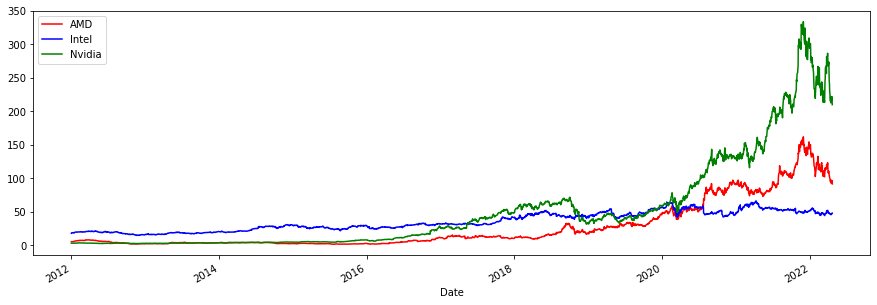

In [5]:
df_amd['Adj Close'].plot(figsize = (15,5), color = 'r', label = 'AMD')
df_intel['Adj Close'].plot(figsize = (15,5), color = 'b', label = 'Intel')
df_nvidia['Adj Close'].plot(figsize = (15,5), color = 'g', label = 'Nvidia')
plt.legend()


### Now we zoom in to the start of COVID-19 period.

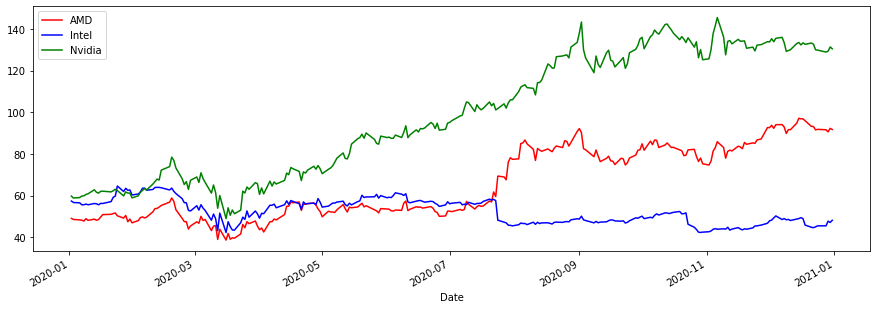

In [6]:
df_amd.loc['2020-01-01' : '2021-01-01', 'Adj Close'].plot(figsize = (15,5), color = 'r', label = 'AMD')
df_intel.loc['2020-01-01' : '2021-01-01', 'Adj Close'].plot(figsize = (15,5), color = 'b', label = 'Intel')
df_nvidia.loc['2020-01-01' : '2021-01-01', 'Adj Close'].plot(figsize = (15,5), color = 'g', label = 'Nvidia')
plt.legend()

We can see that in March - April 2020, all 3 companies had a dip in their stock prices. However, Nvidia ended the year strong, with AMD in 2nd place while Intel ended lower than it started.

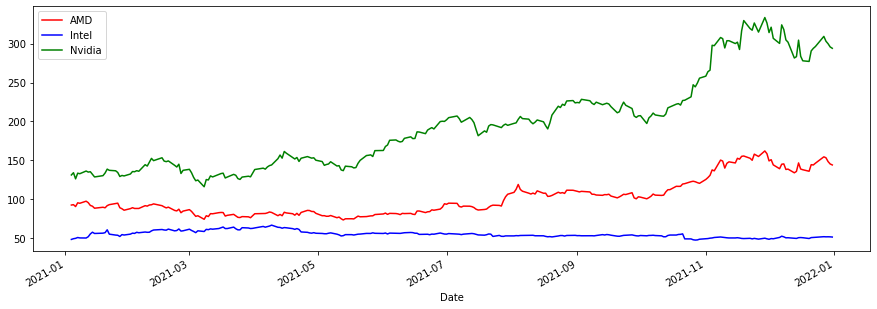

In [7]:
df_amd.loc['2021-01-01' : '2021-12-31', 'Adj Close'].plot(figsize = (15,5), color = 'r', label = 'AMD')
df_intel.loc['2021-01-01' : '2021-12-31', 'Adj Close'].plot(figsize = (15,5), color = 'b', label = 'Intel')
df_nvidia.loc['2021-01-01' : '2021-12-31', 'Adj Close'].plot(figsize = (15,5), color = 'g', label = 'Nvidia')
plt.legend()

### Now we visualise the moving averages of the 3 companies. The moving average smooths out the data by creating a constantly updated average price. By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time frame are mitigated.

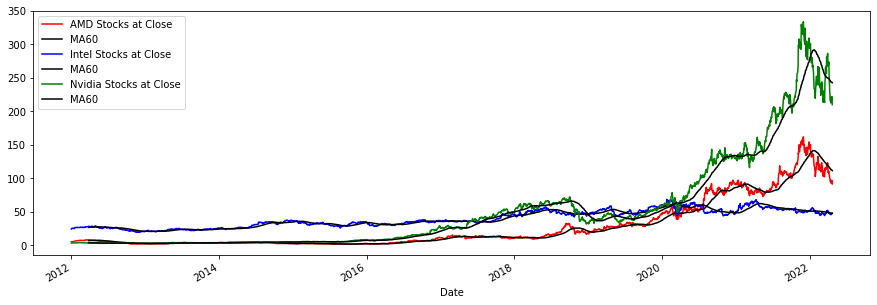

In [8]:
df_amd['Close'].plot(label = 'AMD Stocks at Close', color = 'r', figsize = (15,5))
df_amd['MA60'] = df_amd['Close'].rolling(60).mean()
df_amd['MA60'].plot(figsize = (15,5), color = 'k')

df_intel['Close'].plot(label = 'Intel Stocks at Close', color = 'b', figsize = (15,5))
df_intel['MA60'] = df_intel['Close'].rolling(60).mean()
df_intel['MA60'].plot(figsize = (15,5), color = 'k')

df_nvidia['Close'].plot(label = 'Nvidia Stocks at Close', color = 'g', figsize = (15,5))
df_nvidia['MA60'] = df_nvidia['Close'].rolling(60).mean()
df_nvidia['MA60'].plot(figsize = (15,5), color = 'k')

plt.legend()

### Now, we can determine the risk and return by calculating and plotting the Expected Returns.

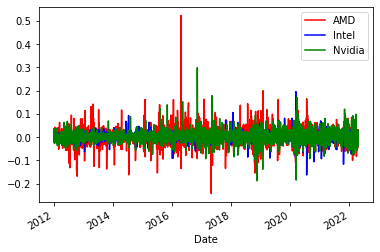

In [9]:
amd_close = df_amd['Adj Close']
amd_returns = amd_close / amd_close.shift(1) - 1

intel_close = df_intel['Adj Close']
intel_returns = intel_close / intel_close.shift(1) - 1

nvidia_close = df_nvidia['Adj Close']
nvidia_returns = nvidia_close / nvidia_close.shift(1) - 1

amd_returns.plot(color = 'r', label = 'AMD')
intel_returns.plot(color = 'b', label = 'Intel')
nvidia_returns.plot(color = 'g', label = 'Nvidia')
plt.legend()

As we can see, AMD has the highest returns in the year 2016 while Intel is the most stable across the 10 year period.

### Now we can combine the 3 companies together to see if there are any correlations among them. 

In [10]:
df_combined_adjclose = web.DataReader(['AMD', 'INTC', 'NVDA'], 'yahoo', start = start, end = end)['Adj Close']

In [11]:
returns_combined = df_combined_adjclose.pct_change()
corr = returns_combined.corr()

Text(0, 0.5, 'Returns Intel')

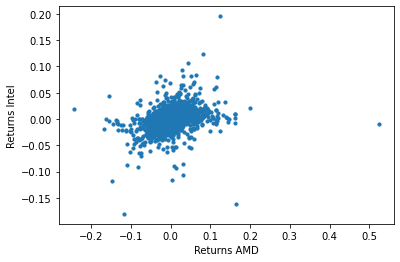

In [12]:
plt.scatter(returns_combined.AMD, returns_combined.INTC, s = 10)
plt.xlabel('Returns AMD')
plt.ylabel('Returns Intel')

Text(0, 0.5, 'Returns Nvidia')

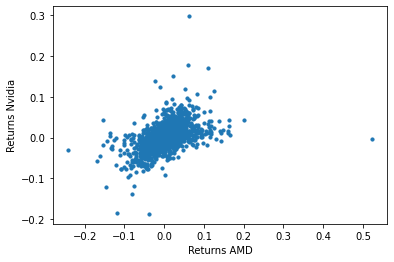

In [13]:
plt.scatter(returns_combined.AMD, returns_combined.NVDA, s = 10)
plt.xlabel('Returns AMD')
plt.ylabel('Returns Nvidia')

Text(0, 0.5, 'Returns Nvidia')

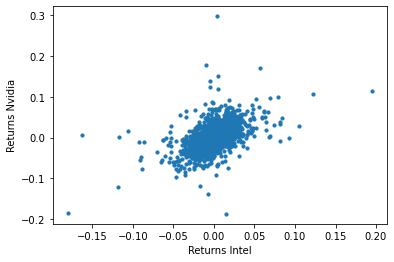

In [14]:
plt.scatter(returns_combined.INTC, returns_combined.NVDA, s = 10)
plt.xlabel('Returns Intel')
plt.ylabel('Returns Nvidia')

In [15]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='AMD', ylabel='AMD'>,
        <AxesSubplot:xlabel='INTC', ylabel='AMD'>,
        <AxesSubplot:xlabel='NVDA', ylabel='AMD'>],
       [<AxesSubplot:xlabel='AMD', ylabel='INTC'>,
        <AxesSubplot:xlabel='INTC', ylabel='INTC'>,
        <AxesSubplot:xlabel='NVDA', ylabel='INTC'>],
       [<AxesSubplot:xlabel='AMD', ylabel='NVDA'>,
        <AxesSubplot:xlabel='INTC', ylabel='NVDA'>,
        <AxesSubplot:xlabel='NVDA', ylabel='NVDA'>]], dtype=object)

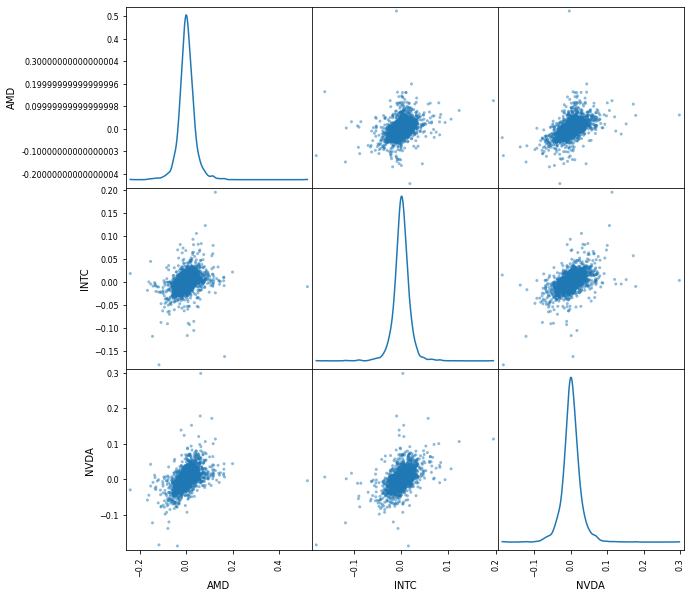

In [16]:
scatter_matrix(returns_combined, diagonal = 'kde', figsize = (10,10))

### We can also plot the stocks Return Rate and Risk.

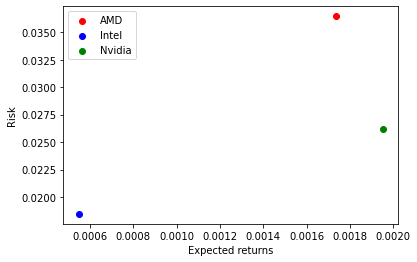

In [17]:
plt.scatter(returns_combined['AMD'].mean(), returns_combined['AMD'].std(), color = 'r', label = 'AMD')
plt.scatter(returns_combined['INTC'].mean(), returns_combined['INTC'].std(), color = 'b', label = 'Intel')
plt.scatter(returns_combined['NVDA'].mean(), returns_combined['NVDA'].std(), color = 'g', label = 'Nvidia')
plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.legend()

As we can see, Intel has the lowest risk but lowest returns, AMD has the highest risk but highest returns while Nvidia has a moderate risk but high returns. Seems like Nvidia is a good choice to buy.

In [18]:
df_amd.to_csv('amd.csv')
df_intel.to_csv('intel.csv')
df_nvidia.to_csv('nvidia.csv')
df_combined.to_csv('combined.csv')

In [20]:
df_amd_pctchange = returns_combined.AMD
df_intel_pctchange = returns_combined.INTC
df_nvidia_pctchange = returns_combined.NVDA

df_amd_pctchange.to_csv('df_amd_pctchange.csv')
df_intel_pctchange.to_csv('df_intel_pctchange.csv')
df_nvidia_pctchange.to_csv('df_nvidia_pctchange.csv')

In [21]:
returns_combined['AMD'].mean()

0.0017384039577295891

In [23]:
risk_return = {'company' : ['AMD', 'Intel', 'Nvidia'], 'mean' : [returns_combined['AMD'].mean(), 
                                                                 returns_combined['INTC'].mean(),
                                                                returns_combined['NVDA'].mean()], 'std_dev' : [returns_combined['AMD'].std(),
                                                                                                              returns_combined['INTC'].std(),
                                                                                                              returns_combined['NVDA'].std()] }

df_risk_return = pd.DataFrame(risk_return)

df_risk_return

,company,mean,std_dev
0,AMD,0.001738,0.036450
1,Intel,0.000547,0.018470
2,Nvidia,0.001953,0.026235


In [24]:
df_risk_return.to_csv('df_risk_return.csv')

<AxesSubplot:xlabel='Date'>

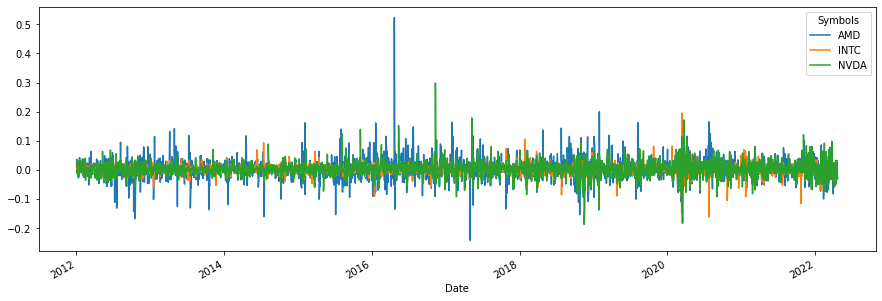

In [25]:
returns_combined.plot(figsize = (15,5))